In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

In [2]:
features = pd.read_pickle("/home/rodrigo.busto/Desktop/facul/3CCO-2021-1-Grupo-08/api-python/analysis/ml_models/pre_processed_data/decision_tree")

In [3]:
X = features.drop(columns = ["cluster"]).values
Y = features["cluster"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 70)

In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

## Árvore de decisão

In [5]:
Y_pred = clf.predict(X_test)
print(f" Accuracy score: {metrics.accuracy_score(Y_test, Y_pred)}")

 Accuracy score: 0.9473684210526315


[Text(111.60000000000001, 190.26, 'X[2] <= 8.0\ngini = 0.736\nsamples = 36\nvalue = [11, 6, 8, 11]'),
 Text(55.800000000000004, 135.9, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0]'),
 Text(167.4, 135.9, 'X[1] <= 35243.185\ngini = 0.646\nsamples = 25\nvalue = [0, 6, 8, 11]'),
 Text(111.60000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'X[2] <= 32.5\ngini = 0.457\nsamples = 17\nvalue = [0, 6, 0, 11]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11]'),
 Text(279.0, 27.180000000000007, 'gini = 0.0\nsamples = 6\nvalue = [0, 6, 0, 0]')]

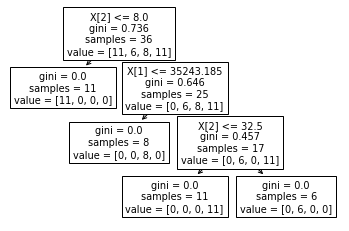

In [6]:
plot_tree(clf)

In [7]:
metrics.confusion_matrix(Y_test, Y_pred)

array([[7, 0, 0, 0],
       [0, 6, 0, 0],
       [0, 0, 3, 1],
       [0, 0, 0, 2]])